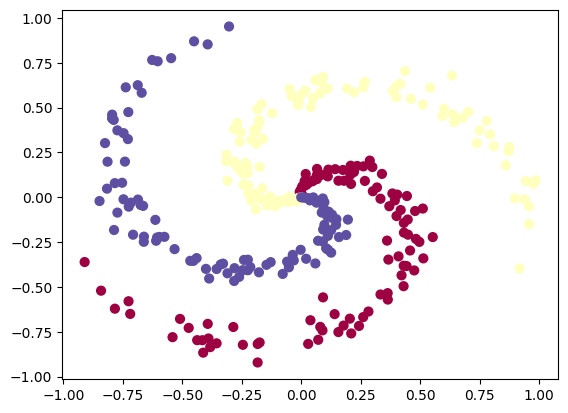

In [45]:
import numpy as np
import matplotlib.pyplot as plt

from DenseLayer import DenseLayer
from ActivationFunc import SoftmaxCategoricalCrossEntropy, ReLU, Softmax
from Accuracy import Accuracy
from Optimizers import StochasticGradientDescent



# https://cs231n.github.io/neural-networks-case-study/
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [46]:
dense1 = DenseLayer(2, 4)
activation1 = ReLU()
dense2 = DenseLayer(4, 3)
activation2_loss = SoftmaxCategoricalCrossEntropy()
accuracy = Accuracy()
SGD = StochasticGradientDescent(learning_rate=0.5, decay=1e-3)

In [47]:
loss_history = np.zeros(10000)
acc_history = np.zeros(10000)

for epoch in range(10000):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    dense2.forward(activation1.output)
    loss = activation2_loss.forward(dense2.output, y)
    acc = accuracy.calculate(y, activation2_loss.output)
    
    loss_history[epoch] = loss
    acc_history[epoch] = acc

    activation2_loss.backward(activation2_loss.output, y)
    dense2.backward(activation2_loss.derivative_inputs)
    activation1.backward(dense2.derivative_inputs)
    dense1.backward(activation1.derivative_inputs)
    
    SGD.before_updating_params()
    SGD.update_params(dense1)
    SGD.update_params(dense2)
    SGD.after_updating_params()

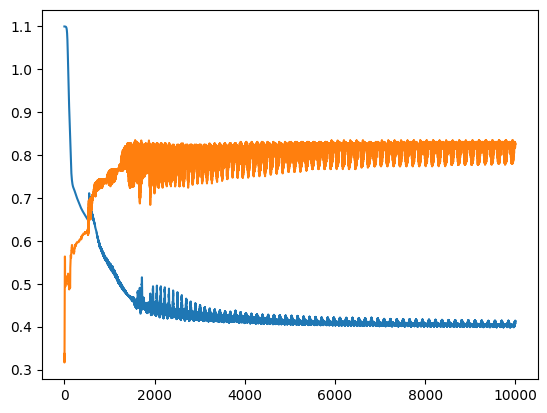

In [48]:
plt.plot(loss_history)
plt.plot(acc_history)